In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_merged_datasets.csv', low_memory=False)
df.head()

,area,building_type,building_nature,image_url,num_bath_rooms,num_bed_rooms,price,property_description,property_overview,property_url,...,id,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count,division,zone
0,1185.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,6100000.0,Grab This 1185 Sq Ft Beautiful Flat Is Vacant ...,This flat consists of facilities you can think...,https://www.bproperty.com/en/property/details-...,...,bproperty-0,0,1,2,0,2,0,3,Dhaka,Khilgaon
1,2464.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,4.0,3.0,28900000.0,A Vibrant 2464 Sq Ft Residential Flat For Sale...,Ready to move in somewhere with everything nea...,https://www.bproperty.com/en/property/details-...,...,bproperty-1,0,2,0,0,3,0,4,Dhaka,Dhanmondi
2,1140.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,0.0,3.0,7500000.0,1140 Sq Ft Nicely Planned Apartment Is Availab...,A spacious 1140 Square Feet apartment in Mirp...,https://www.bproperty.com/en/property/details-...,...,bproperty-2,0,2,2,0,2,0,4,Dhaka,Mirpur
3,1920.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,20000000.0,A Modern Well-planned Apartment Of 1920 Sq Ft ...,Looking for the perfect home that offers a lux...,https://www.bproperty.com/en/property/details-...,...,bproperty-3,0,1,2,0,3,0,3,Dhaka,Bashundhara R/A
4,1445.0,Apartment,Residential,https://images-cdn.bproperty.com/thumbnails/15...,3.0,3.0,10800000.0,"1445 Sq Ft Ready Flat For Sale In Banasree, Wi...",Choosing a new home can be an overwhelming exp...,https://www.bproperty.com/en/property/details-...,...,bproperty-4,0,0,2,0,1,0,4,Dhaka,Khilgaon


In [3]:
df.describe()

,area,num_bath_rooms,num_bed_rooms,price,relaxation_amenity_count,security_amenity_count,maintenance_or_cleaning_amenity_count,social_amenity_count,expendable_amenity_count,service_staff_amenity_count,unclassify_amenity_count
count,3.370100e+04,33701.000000,33701.000000,3.370100e+04,33701.000000,33701.000000,33701.000000,33701.000000,33701.000000,33701.000000,33701.000000
mean,3.249107e+03,1.680870,2.318091,1.070405e+09,0.013887,0.496454,0.780570,0.080324,1.189015,0.021275,1.810747
std,1.220057e+05,1.635645,1.837590,1.318148e+11,0.188190,0.747793,1.009691,0.403382,1.552733,0.234156,2.122586
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+03,0.000000,2.000000,2.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.350000e+03,2.000000,3.000000,1.700000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.061000e+03,3.000000,3.000000,6.000000e+06,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,3.000000
max,1.450147e+07,50.000000,94.000000,2.400000e+13,5.000000,5.000000,3.000000,5.000000,6.000000,4.000000,18.000000


In [4]:
df.shape

(33701, 24)

In [5]:
# replacing 0 with nan in relavent features to better perform outlier detection
cols = ['area', 'price']
df[cols] = df[cols].replace(0,np.nan)

In [6]:
#function to remove outliers with percentile and iqr techniques
def remove_outliers(dataframe,feature, method='percentile', lower=0.01, upper=0.99):
    if method == 'percentile':
        lower_bound = dataframe[feature].quantile(lower)
        upper_bound = dataframe[feature].quantile(upper)
        print(f"lower_bound: {lower_bound} upper_bound: {upper_bound}")
    elif method == 'iqr':
        q1 = dataframe[feature].quantile(0.25)
        q3 = dataframe[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        print(f"lower_bound: {lower_bound} upper_bound: {upper_bound}")
    else:
        raise ValueError('Invalid method')
    no_outlier_df = dataframe[((dataframe[feature] > lower_bound) & (dataframe[feature] < upper_bound))]
    print(f"shape before removing {feature} outlier: {dataframe.shape} \
          shape after removing {feature} outlier: {no_outlier_df.shape}")
    #plotting the result
    plt.hist(no_outlier_df[feature], bins=20, rwidth=0.8, log=True, density=True)
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.title(f"{feature} distribution after removing outliers")
    plt.show()

    return no_outlier_df

def plot_distribution(dataframe, feature):
    plt.hist(dataframe[feature], bins=20, rwidth=0.8, log=True, density=True)
    plt.xlabel(feature)
    plt.ylabel('counts')
    plt.title(f"{feature} distribution before removing outlier")
    plt.show()

In [7]:
## its good to separate the datasets based on building_nature to better identify outliers
residential_df = df[df['building_nature']=='Residential']
commercial_df = df[df['building_nature']=='Commercial']
print(f"residential_df: {residential_df.shape} commercial_df{commercial_df.shape}")

residential_df: (27220, 24) commercial_df(6481, 24)


## residential property

### removing area outlier

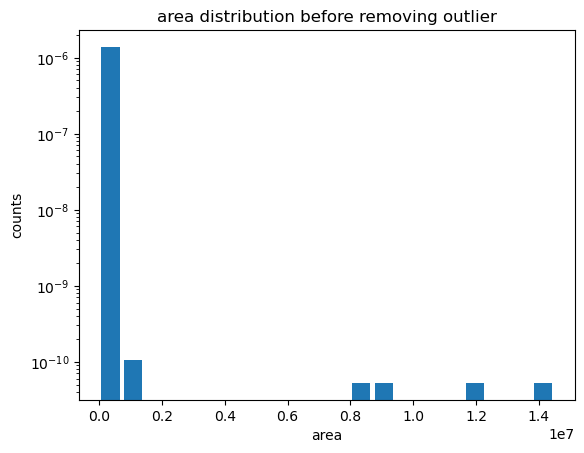

In [8]:
plot_distribution(residential_df,'area')

lower_bound: 300.0 upper_bound: 5600.0
shape before removing area outlier: (27220, 24)           shape after removing area outlier: (25698, 24)


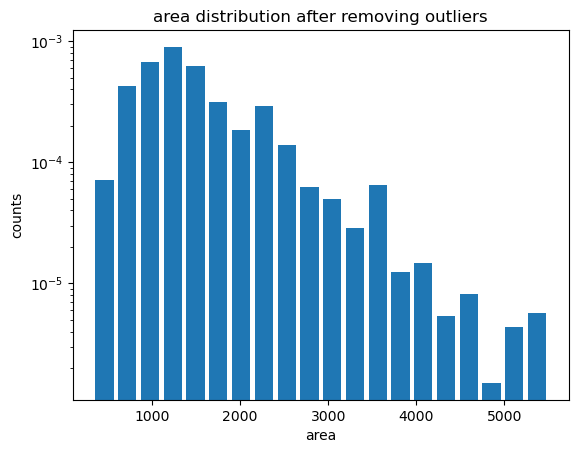

In [9]:
residential_df = remove_outliers(residential_df,'area', lower=0.01, upper=0.99)

### removing price outlier

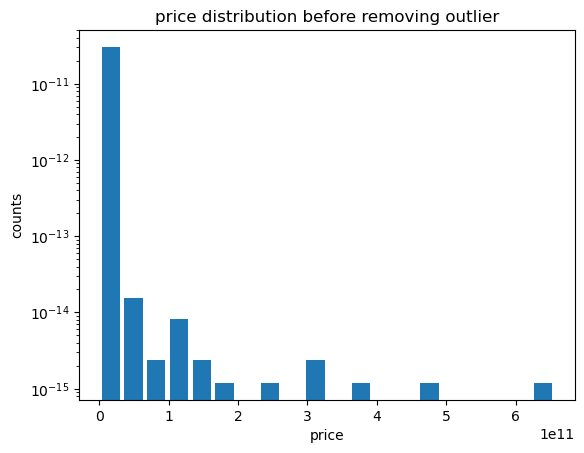

In [10]:
plot_distribution(residential_df,'price')

In [11]:
#its better to divide the dataset on the basis or purpose(sale/rent) to
#better identify price outliers
sale_residential_df = residential_df[residential_df['purpose']=='Sale']
rent_residential_df = residential_df[residential_df['purpose']== 'Rent']
print(f"sale_residential_df: {sale_residential_df.shape} rent_residnetial_df: {rent_residential_df.shape}")

sale_residential_df: (12044, 24) rent_residnetial_df: (13654, 24)


### sale price residential

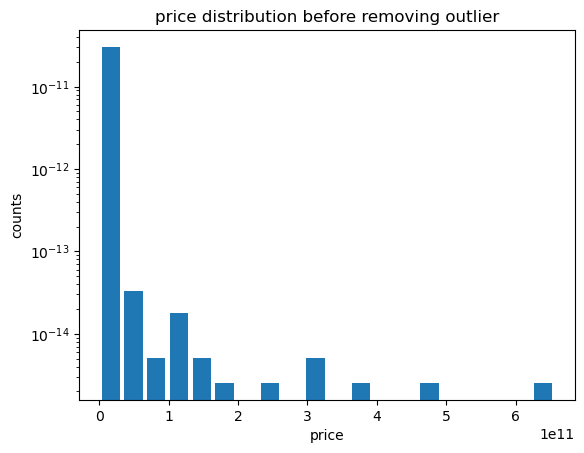

In [12]:
plot_distribution(sale_residential_df,'price')

lower_bound: 2000000.0 upper_bound: 27379999.99999993
shape before removing price outlier: (12044, 24)           shape after removing price outlier: (11294, 24)


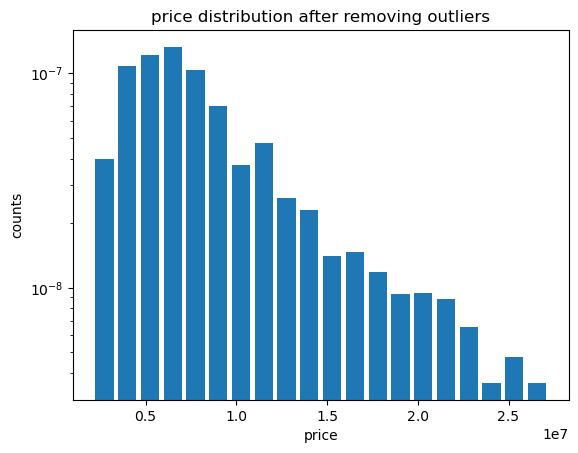

In [13]:
#removing outlier area using percentile
sale_residential_df = remove_outliers(dataframe=sale_residential_df, feature='price', lower=0.01, upper=0.95)

### rent price residential

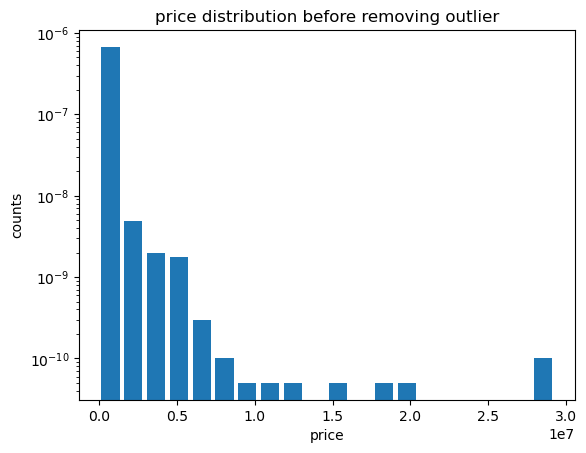

In [14]:
plot_distribution(rent_residential_df, 'price')

lower_bound: 4000.0 upper_bound: 180000.0
shape before removing price outlier: (13654, 24)           shape after removing price outlier: (12789, 24)


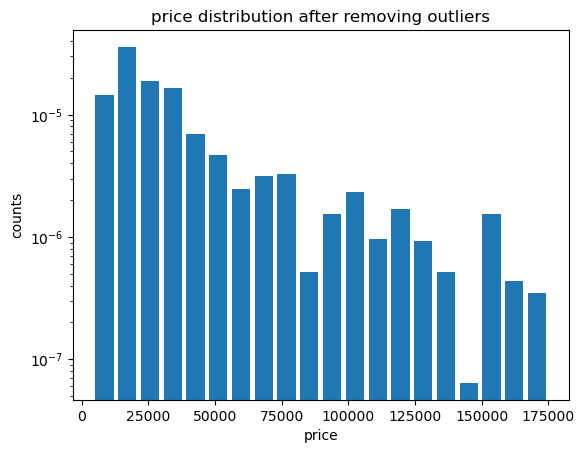

In [15]:
rent_residential_df = remove_outliers(rent_residential_df, feature='price', lower=0.01, upper=0.95)

In [16]:
#combining back after removing price outlier from residential_df
new_residential_df = pd.concat([rent_residential_df,sale_residential_df])
new_residential_df.shape

(24083, 24)

### removing outliers in num_bath_rooms and num_bed_rooms

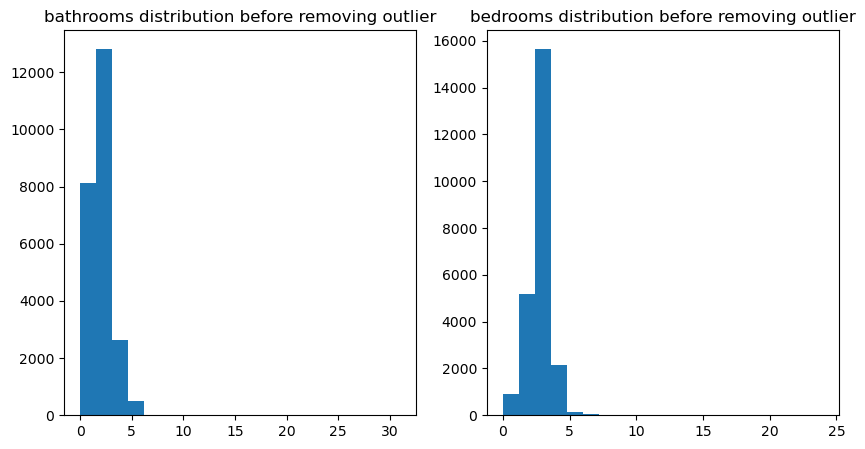

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(new_residential_df['num_bath_rooms'], bins=20)
axs[0].set_title('bathrooms distribution before removing outlier')
axs[1].hist(new_residential_df['num_bed_rooms'], bins=20)
axs[1].set_title('bedrooms distribution before removing outlier')
plt.show()

In [18]:
#removing bathrooms and bedrooms outlier using general idea

new_residential_df = new_residential_df [((new_residential_df['num_bath_rooms'] >= 0) & (new_residential_df['num_bath_rooms'] <= 7))]
new_residential_df = new_residential_df [((new_residential_df['num_bed_rooms'] >= 0) & (new_residential_df['num_bed_rooms'] <= 7))]


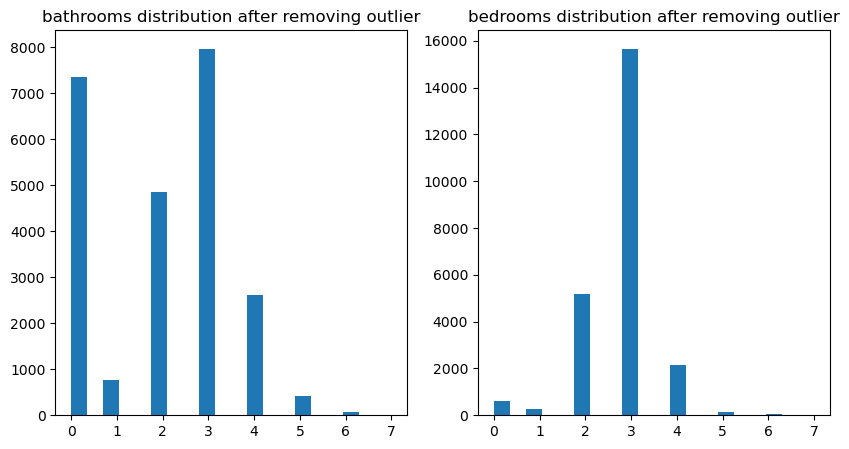

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(new_residential_df['num_bath_rooms'], bins=20)
axs[0].set_title('bathrooms distribution after removing outlier')
axs[1].hist(new_residential_df['num_bed_rooms'], bins=20)
axs[1].set_title('bedrooms distribution after removing outlier')
plt.show()

In [20]:
new_residential_df.shape

(24066, 24)

# Commercial_property

## price outlier

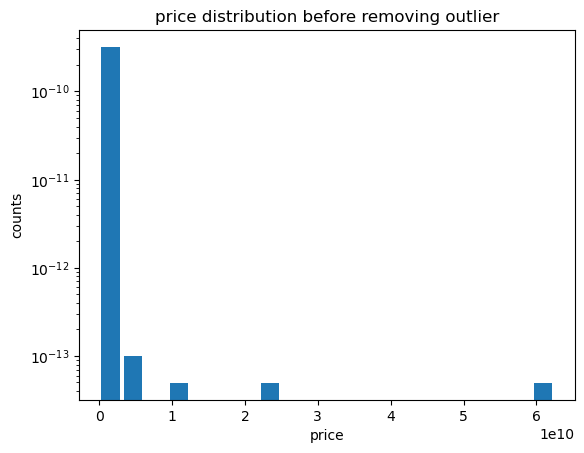

In [21]:
plot_distribution(commercial_df, 'price')

C:\Users\saran\AppData\Local\Temp\ipykernel_10996\1196147638.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_values = commercial_df.groupby('building_type').max()


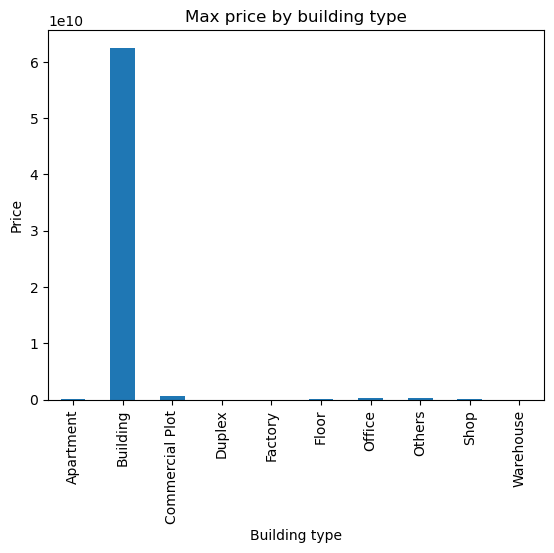

In [22]:
#visualizing the unusual behavious
max_values = commercial_df.groupby('building_type').max()
max_values.plot(kind='bar', y='price', legend=False)
plt.title('Max price by building type')
plt.xlabel('Building type')
plt.ylabel('Price')
plt.show()

In [23]:
#there seems to be too much variance in the area in commercial properties
#better dividing the dataset in related tpyes of buildings
large_property =(commercial_df['building_type'] == 'Building') | (commercial_df['building_type'] == 'Commercial Plot')
large_commercial_df = commercial_df[large_property]
print(large_commercial_df.shape)
other_property = (commercial_df['building_type'] != 'Building') & (commercial_df['building_type'] != 'Commercial Plot')
other_commercial_df = commercial_df[other_property]
print(other_commercial_df.shape)

(1361, 24)
(5120, 24)


### large commercial

In [24]:
#its better to further divide the dataset on the basis or purpose(sale/rent) to
#better identify price outliers
sale_large_commercial_df = large_commercial_df[large_commercial_df['purpose']=='Sale']
rent_large_commercial_df = large_commercial_df[large_commercial_df['purpose']== 'Rent']
print(f"sale_large_commercial_df: {sale_large_commercial_df.shape} rent_large_commercial_df: {rent_large_commercial_df.shape}")

sale_large_commercial_df: (43, 24) rent_large_commercial_df: (1318, 24)


### sale large commercial

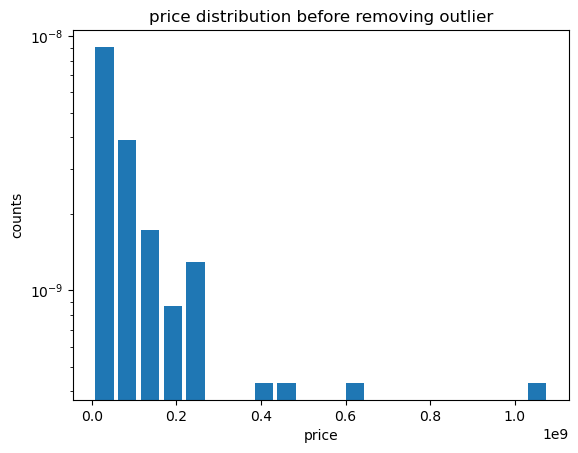

In [25]:
plot_distribution(sale_large_commercial_df,'price')

lower_bound: 3369000.0 upper_bound: 444999999.99999994
shape before removing price outlier: (43, 24)           shape after removing price outlier: (39, 24)


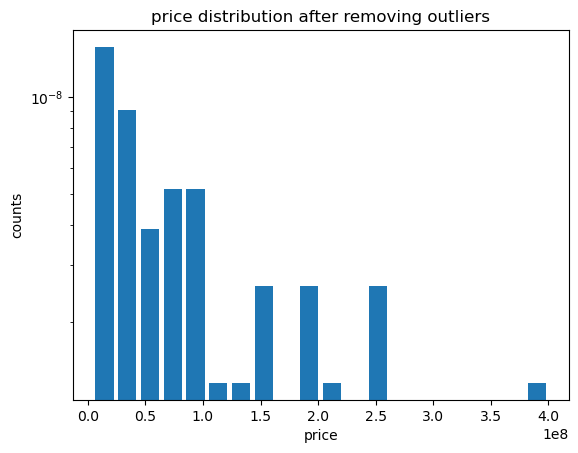

In [26]:
sale_large_commercial_df = remove_outliers(sale_large_commercial_df, feature='price', lower=0.01, upper=0.95)

### rent large commercial

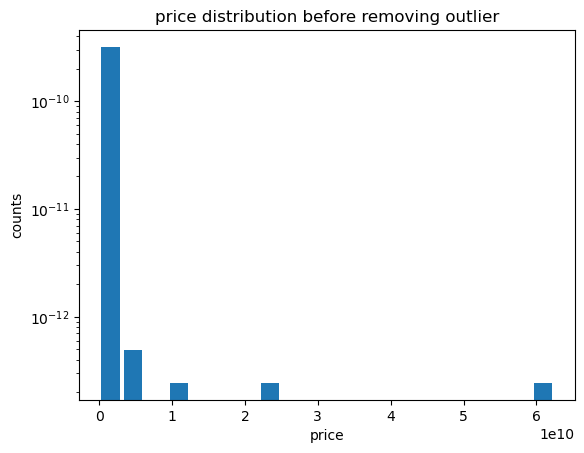

In [27]:
plot_distribution(rent_large_commercial_df, 'price')

lower_bound: 10000.0 upper_bound: 2000000.0
shape before removing price outlier: (1318, 24)           shape after removing price outlier: (1229, 24)


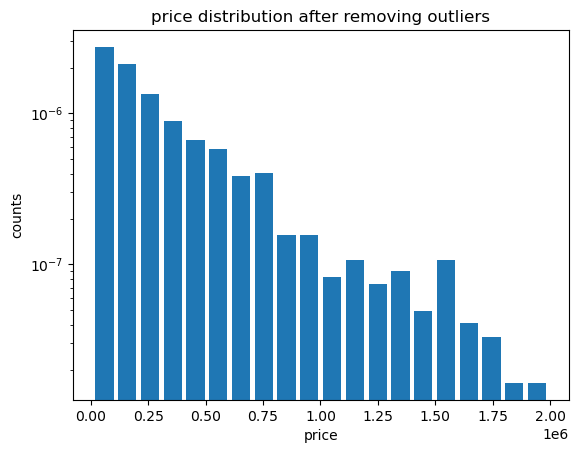

In [28]:
rent_large_commercial_df = remove_outliers(rent_large_commercial_df,'price', lower=0.01, upper=0.95)

In [29]:
large_commercial_df = pd.concat([sale_large_commercial_df,rent_large_commercial_df])
large_commercial_df.shape

(1268, 24)

### other commercial

In [30]:
#its better to further divide the dataset on the basis or purpose(sale/rent) to
#better identify price outliers
sale_other_commercial_df = other_commercial_df[other_commercial_df['purpose']=='Sale']
rent_other_commercial_df = other_commercial_df[other_commercial_df['purpose']== 'Rent']
print(f"sale_other_commercial_df: {sale_other_commercial_df.shape} rent_other_commercial_df: {rent_other_commercial_df.shape}")

sale_other_commercial_df: (713, 24) rent_other_commercial_df: (4407, 24)


### sale other commercial

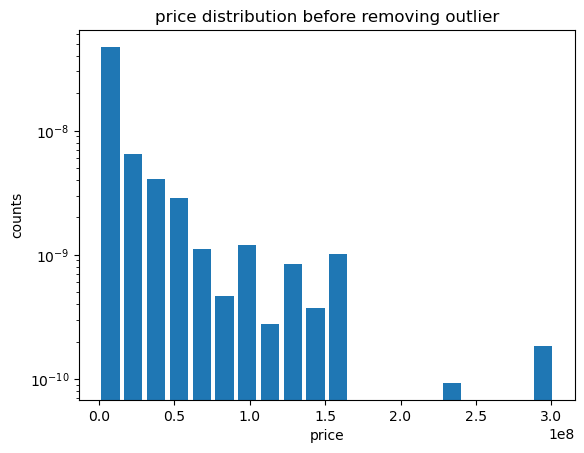

In [31]:
plot_distribution(sale_other_commercial_df,'price')

lower_bound: 1200000.0 upper_bound: 105000000.0
shape before removing price outlier: (713, 24)           shape after removing price outlier: (662, 24)


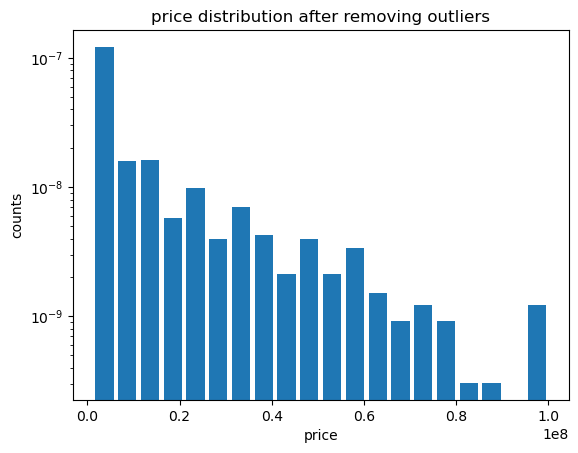

In [32]:
sale_other_commercial_df = remove_outliers(sale_other_commercial_df, 'price', lower=0.01, upper=0.95)

### rent other commercial

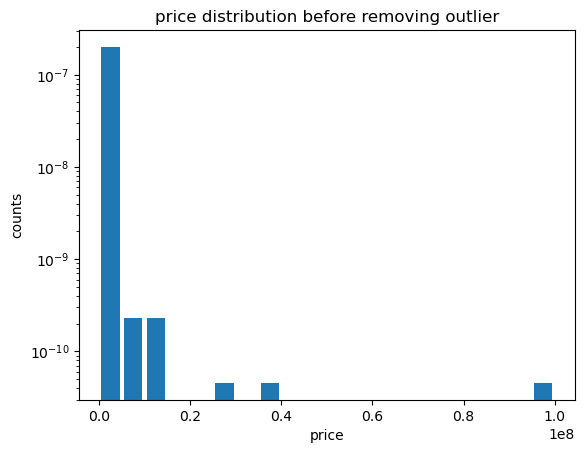

In [33]:
plot_distribution(rent_other_commercial_df, 'price')

lower_bound: 10000.0 upper_bound: 950000.0
shape before removing price outlier: (4407, 24)           shape after removing price outlier: (3937, 24)


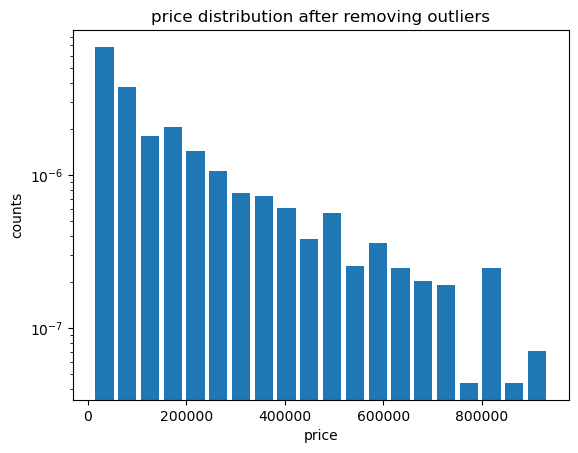

In [34]:
rent_other_commercial_df = remove_outliers(rent_other_commercial_df,'price', lower=0.05, upper=0.95)

In [35]:
other_commercial_df = pd.concat([sale_other_commercial_df, rent_other_commercial_df])
other_commercial_df.shape

commercial_df = pd.concat([large_commercial_df,other_commercial_df])
commercial_df.shape

(5867, 24)

## area outliers

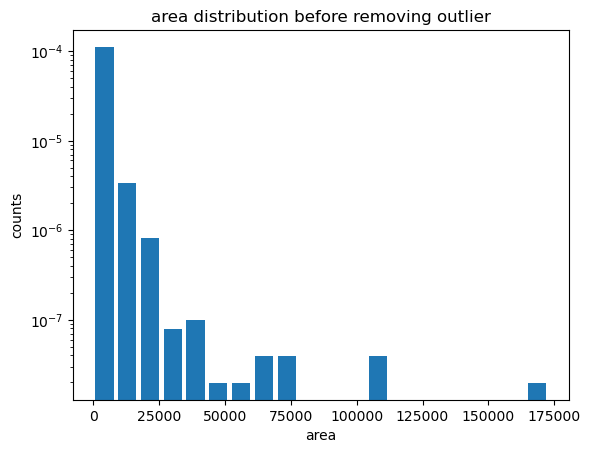

In [36]:
plot_distribution(commercial_df, 'area')

i = 0
for index, row in commercial_df[commercial_df['area'] < expensive_commercial_area_lower].iterrows():
    print(row['property_overview'],'\n')
    i = i+1
print(i)